In [1]:
from utils.rsimg_io import readTiff
from utils.imgShow import imgShow, imsShow
from utils.img2patch import img2patch, crop, crop_scales
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path_rsimg = 'data/l8_scene_05.tif'
path_truth = 'data/l8_scene_05_truth.tif'
l8_img = readTiff(path_rsimg)
l8_truth = readTiff(path_truth)
l8_img.array.shape


(1410, 1690, 6)

Text(0.5, 1.0, 'groud truth')

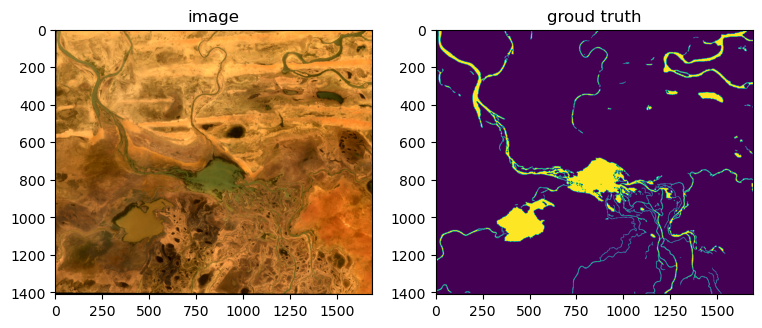

In [3]:
fig, ax = plt.subplots(1,2,figsize=(9,4))
imgShow(l8_img.array, ax=ax[0])
ax[1].imshow(l8_truth.array)
ax[0].set_title('image')
ax[1].set_title('groud truth')


### Convert image to patches.

In [4]:
imgPat_ins = img2patch(img=l8_img.array, patch_size=200, edge_overlay = 30)
patch_low_list = imgPat_ins.toPatch()
patch_high_list = imgPat_ins.higher_patch_crop(higher_patch_size=300)
print(len(patch_low_list), len(patch_high_list))


99 99


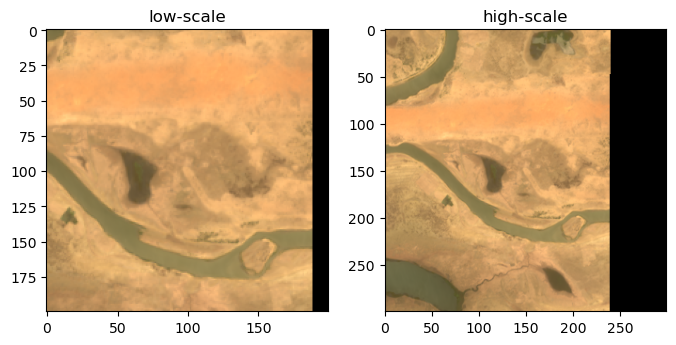

In [5]:
i_img = 20
fig, ax = plt.subplots(1,2,figsize=(8,4))
imsShow(img_list=[patch_low_list[i_img], patch_high_list[i_img]], \
                img_name_list=['low-scale', 'high-scale'], clip_list=[2,2])




### Randomly crop image and truth image to multiscale patches.


In [6]:
### layer stacking for the image and truth image.
truth = np.expand_dims(l8_truth.array, axis=-1)
img_truth = np.concatenate([l8_img.array, truth], axis=-1)


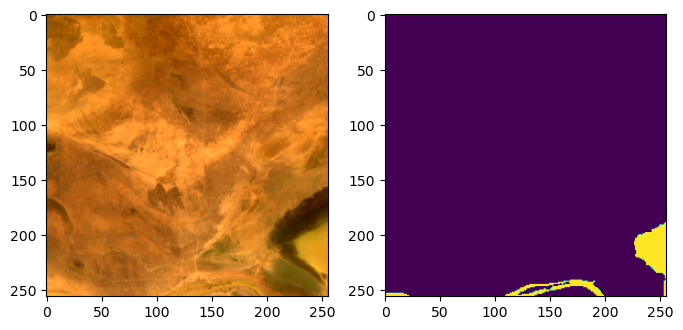

In [7]:
patch = crop(image=img_truth, size=(256,256))
fig, ax = plt.subplots(1,2,figsize=(8,4))
imgShow(patch[:,:,0:-1], ax=ax[0])
ax[1].imshow(patch[:,:,-1])


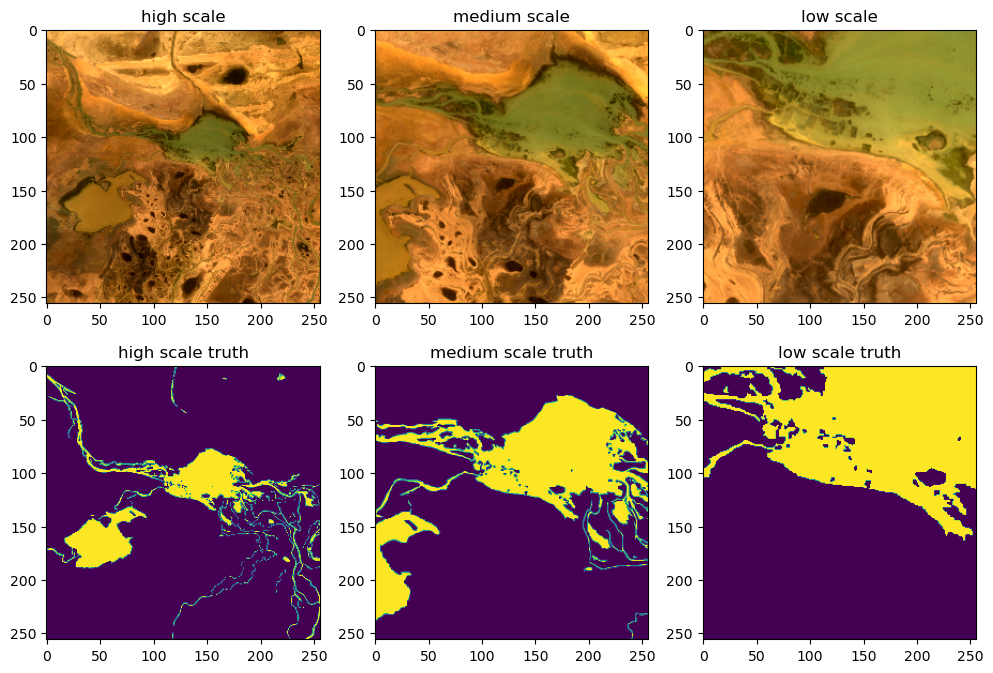

In [9]:
patches = crop_scales(image=img_truth, scales=(1024, 512, 256))
# fig, ax = plt.subplots(2,3,figsize=(12,6))
plt.figure(figsize=(12, 8))
patches_img = [patch[:,:,0:-1] for patch in patches]
patches_truth = [patch[:,:,-1] for patch in patches]
imsShow(img_list=patches_img+patches_truth,img_name_list=['high scale', 'medium scale', 'low scale', \
                          'high scale truth','medium scale truth','low scale truth'], clip_list=[2,2,2,0,0,0], row=2, col=3)

